# Import Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

# Data preparation

In [2]:
df_admit = pd.read_csv('Admission_predict.csv')
df_admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [3]:
df_admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [4]:
df_admit['Research']=df_admit['Research'].astype(object)

In [5]:
df_admit=df_admit.drop('Serial No.',axis=1)

In [6]:
df_admit.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

In [7]:
df_admit.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Division of Variables:

In [8]:
df_target=df_admit['Chance of Admit']
df_feature=df_admit.drop('Chance of Admit',axis=1)

In [9]:
df_num=df_feature.select_dtypes(include=[np.number])
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [10]:
df_cat=df_feature.select_dtypes(include=[np.object])
df_cat.columns

Index(['Research'], dtype='object')

In [11]:
dummy_var=pd.get_dummies(data=df_cat,drop_first=True)

Distribution of Variables:

Numerical Feature Variables

In [12]:
#Normality:
df_num.skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
dtype: float64

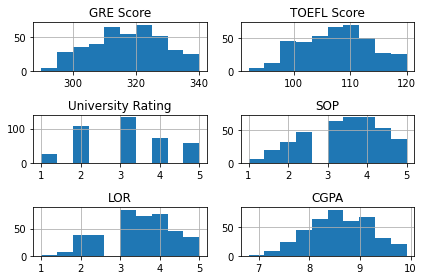

In [13]:
#Normality:
df_num.hist()
plt.tight_layout()
plt.show()

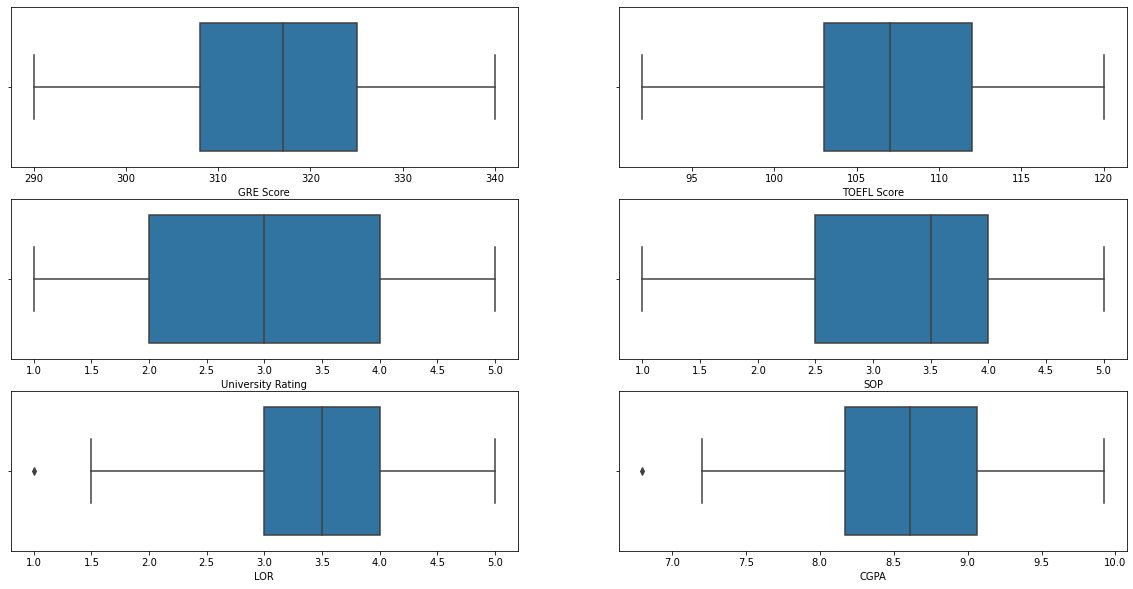

In [14]:
#Outlier Examinations
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for var,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_admit[var],ax=subplot)
plt.show()

Categorical Feature Variable

<AxesSubplot:xlabel='Research', ylabel='count'>

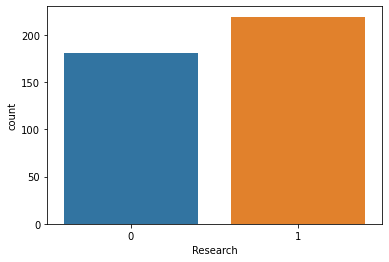

In [15]:
sns.countplot(df_admit.Research)

Distribution of Target variable

<AxesSubplot:xlabel='Chance of Admit', ylabel='count'>

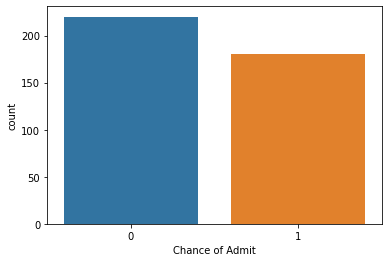

In [16]:
sns.countplot(df_admit['Chance of Admit'])

Scaling Numerical feature variables

In [17]:
num_scale=StandardScaler().fit_transform(df_num)
df_num_scale=pd.DataFrame(num_scale,columns=df_num.columns)
df_num_scale.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029


Complete Feature Set

In [18]:
X=pd.concat([df_num_scale,dummy_var],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


Splitting the Data Set: Train & Test Splitting:

In [19]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test=train_test_split(X,df_target,random_state=100,test_size=0.3)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (280, 8)
y_train (280,)
X_test (120, 8)
y_test (120,)


Logistic Regression (Full Model)

In [20]:
logreg=sm.Logit(y_train,X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.258693
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            7
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                  0.6244
Time:                        20:06:55   Log-Likelihood:                -72.434
converged:                       True   LL-Null:                       -192.87
Covariance Type:            nonrobust   LLR p-value:                 2.419e-48
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8134      0.338     -2.404      0.016      -1.477      -0.150
GRE Scor

In [21]:
print("AIC:",logreg.aic)

AIC: 160.86822123827972


Odds, Probability, Classification

In [23]:
df_odds=pd.DataFrame(np.exp(logreg.params),columns=['Odds'])
df_odds

,Odds
const,0.443357
GRE Score,2.247558
TOEFL Score,2.352351
University Rating,1.539913
SOP,1.440130
LOR,1.340009
CGPA,6.331057
Research_1,1.416580


In [25]:
y_pred_prob=logreg.predict(X_test)
y_pred_prob.head(10)

248    0.806962
318    0.584090
173    0.973940
285    0.992736
184    0.076380
235    0.981052
124    0.065490
282    0.447262
151    0.996792
169    0.005414
dtype: float64

In [26]:
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]
y_pred[0:10]

[1, 1, 1, 1, 0, 1, 0, 0, 1, 0]

Model Performance

Confusion Matrix

<AxesSubplot:>

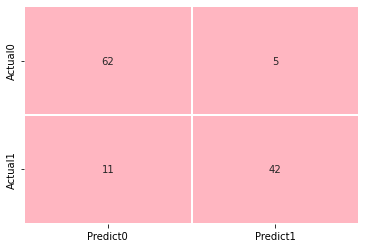

In [34]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predict0','Predict1'],index=['Actual0','Actual1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightpink']),cbar=False,linewidth=0.2)

In [35]:
    TN=cm[0,0]
    TP=cm[1,1]
    FP=cm[0,1]
    FN=cm[1,0]
    

In [36]:
accuracy=(TN+TP)/(TN+TP+FP+FN)
accuracy

0.8666666666666667

In [37]:
precision=TP/(TP+FP)
precision

0.8936170212765957

In [38]:
recall=TP/(TP+FN)
recall

0.7924528301886793

In [39]:
specificity=TN/(TN+FP)
specificity

0.9253731343283582

In [40]:
f1_score=2*(precision*recall)/(precision+recall)
f1_score

0.8400000000000001

In [41]:
acc_report=classification_report(y_test,y_pred)
print(acc_report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        67
           1       0.89      0.79      0.84        53

    accuracy                           0.87       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



ROC Curve & AUC Value

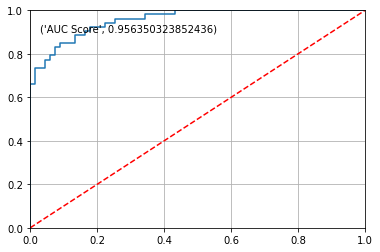

In [49]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.03,y=0.9,s=('AUC Score',metrics.roc_auc_score(y_test,y_pred_prob)))
plt.grid(True)

Identifying Best Cut-off Probability(threshold probability)

Youden Index (J Index)

In [52]:
youden_table=pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresholds})
youden_table['Difference']=youden_table.TPR-youden_table.FPR
youden_table=youden_table.sort_values('Difference',ascending=False).reset_index(drop=True)
youden_table.head(10)

,TPR,FPR,Threshold,Difference
0,0.849057,0.089552,0.447262,0.759504
1,0.830189,0.074627,0.455962,0.755562
2,0.886792,0.134328,0.235019,0.752464
3,0.924528,0.179104,0.180777,0.745424
4,0.905660,0.164179,0.184593,0.741481
5,0.830189,0.089552,0.451450,0.740636
6,0.792453,0.059701,0.544899,0.732751
7,0.773585,0.044776,0.584090,0.728809
8,0.905660,0.179104,0.181989,0.726556
9,0.886792,0.164179,0.197046,0.722613


Confusion Matrix for Youden Index suggested Threshold Probability

In [54]:
y_pred_youden=[0 if x<0.447262 else 1 for x in y_pred_prob]

<AxesSubplot:>

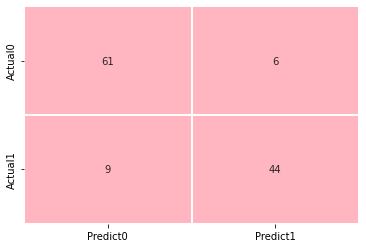

In [55]:
cm=confusion_matrix(y_test,y_pred_youden)
conf_matrix=pd.DataFrame(data=cm, columns=['Predict0','Predict1'],index=['Actual0','Actual1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightpink']),cbar=False,linewidth=0.2)

In [56]:
acc_report=classification_report(y_test,y_pred_youden)
print(acc_report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        67
           1       0.88      0.83      0.85        53

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120

